In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
)
from sklearn.preprocessing import LabelEncoder

In [125]:
file_path = "C:/Users/Disha Devatha/Downloads/GymDataset.csv"
data = pd.read_csv(file_path)
print(data.head())
data.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56    Male         88.3        1.71                      1.69   
1   46  Female         74.9        1.53                      1.30   
2   32  Female         68.1        1.66                      1.11   
3   25    Male         53.2        1.70                      0.59   
4   38    Male         46.1        1.79                      0.64   

   Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313         Yoga            12.6                    3.5   
1              883         HIIT            33.9                    2.1   
2              677       Cardio            33.4                    2.3   
3              532     Strength            28.8                    2.1   
4              556     Strength            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2             

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       8
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   8
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              6
dtype: int64

In [126]:
data.fillna({
    'Fat_percentage': data['Fat_Percentage'].mean(),
    'Height (m)': data['Height (m)'].mean(),
    'BMI': data['BMI'].mean(),
}, inplace=True
)

if 'Fat_Percentage' in data.columns:
    data['Fat_Percentage'] = data['Fat_Percentage'].fillna(data['Fat_Percentage'].mode()[0])

data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

In [127]:
file_path = "C:/Users/Disha Devatha/Downloads/GymDataset_Encoded.csv"
data = pd.read_csv(file_path)
print(data.head())
data.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56       1         88.3        1.71                      1.69   
1   46       0         74.9        1.53                      1.30   
2   32       0         68.1        1.66                      1.11   
3   25       1         53.2        1.70                      0.59   
4   38       1         46.1        1.79                      0.64   

   Calories_Burned  Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313             3            12.6                    3.5   
1              883             1            33.9                    2.1   
2              677             0            33.4                    2.3   
3              532             2            28.8                    2.1   
4              556             2            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2       

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

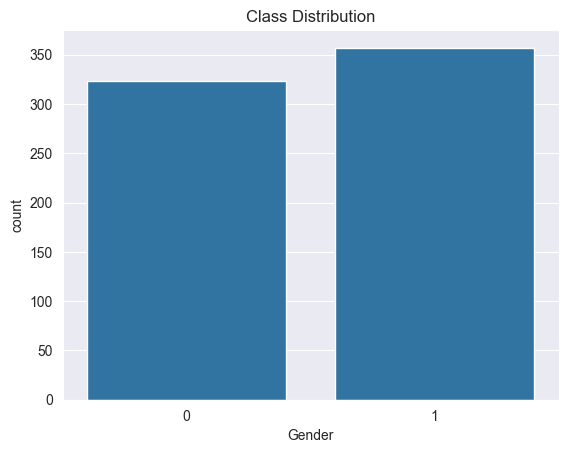

In [128]:
# Visualizing class distribution
sns.countplot(x='Gender', data=data)
plt.title('Class Distribution')
plt.show()

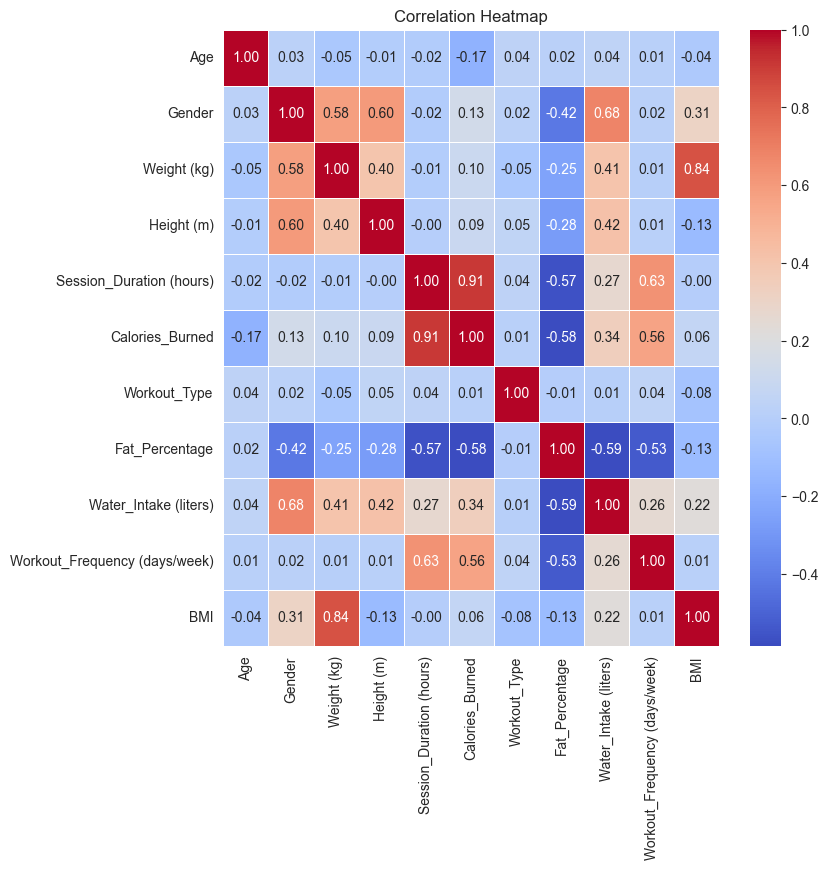

In [129]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [130]:
# Feature-target split
X = data.drop(['Age', 'Weight (kg)', 'Height (m)', 'Fat_Percentage', 'BMI'], axis=1)
y = data['Workout_Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
# Decision Tree Classifier with Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
# Decision Tree Classifier with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [133]:
# Predictions and Metrics
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Precision, Recall, F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    # ROC Curve
    if len(np.unique(y_test)) == 2:  # Binary classification
        y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='best')
        plt.show()

In [134]:
print("\nEvaluation for Gini Index:")
evaluate_model(clf_gini, X_test, y_test)


Evaluation for Gini Index:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204

Confusion Matrix:
[[57  0  0  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 47]]
Precision: 1.00, Recall: 1.00, F1-Score: 1.00


In [135]:
print("\nEvaluation for Entropy:")
evaluate_model(clf_entropy, X_test, y_test)


Evaluation for Entropy:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        47

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204

Confusion Matrix:
[[57  0  0  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 47]]
Precision: 1.00, Recall: 1.00, F1-Score: 1.00


In [136]:
# Encoding categorical variables
label_encoders = {}
for column in ['Gender', 'Workout_Type']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Visualization of the Decision Tree
if 'Workout_Type' in label_encoders:
    class_names = [str(cls) for cls in label_encoders['Workout_Type'].classes_]
else:
    class_names = [str(cls) for cls in np.unique(y)]

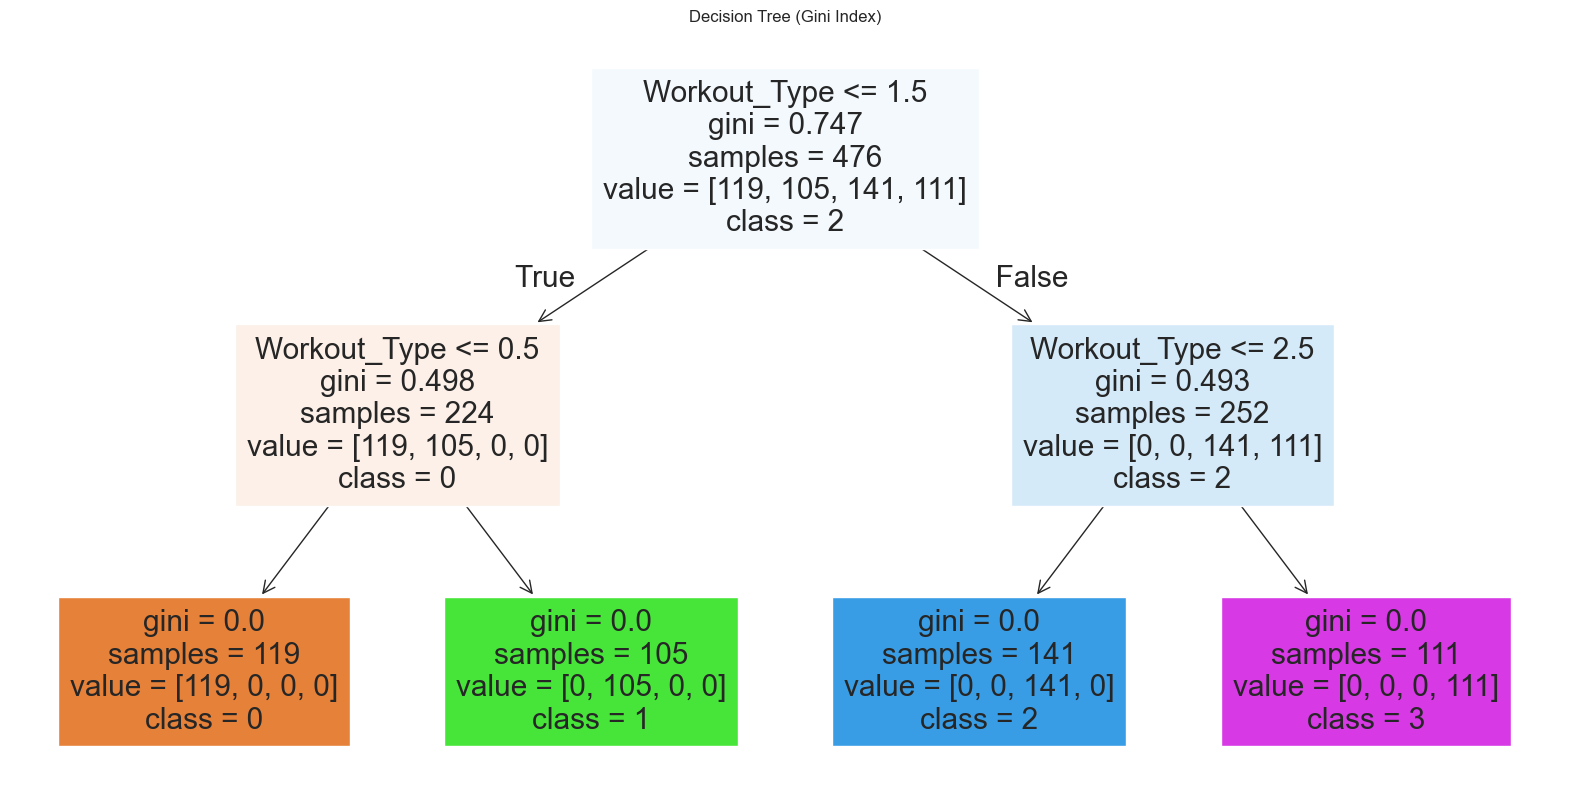

In [137]:
plt.figure(figsize=(20, 10))
plot_tree(clf_gini, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree (Gini Index)")
plt.show()

Prepruned Decision Tree Accuracy: 1.00


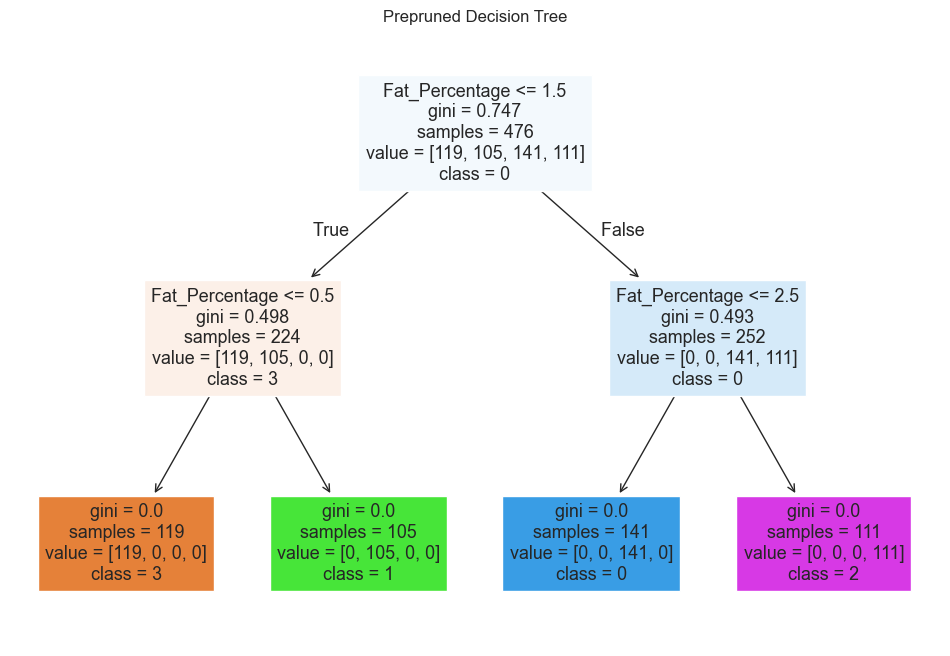

In [138]:
feature_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Fat_Percentage', 'BMI']
class_names = y.unique().astype(str)

# Prepruned Decision Tree
prepruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
prepruned_tree.fit(X_train, y_train)

prepruned_y_pred = prepruned_tree.predict(X_test)
prepruned_accuracy = accuracy_score(y_test, prepruned_y_pred)
print(f"Prepruned Decision Tree Accuracy: {prepruned_accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(prepruned_tree, feature_names=feature_columns, class_names=class_names, filled=True)
plt.title("Prepruned Decision Tree")
plt.show()

Postpruned Decision Tree Accuracy (before pruning): 1.00
Postpruned Decision Tree Accuracy (after pruning): 1.00


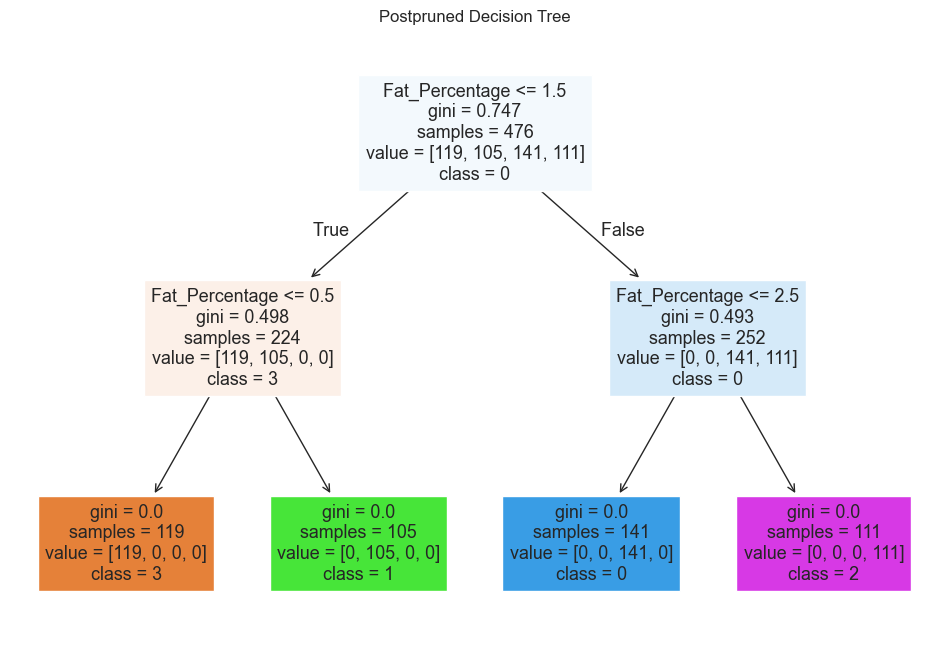

In [139]:
# Postpruned Decision Tree (training without pruning and applying pruning afterwards)
postpruned_tree = DecisionTreeClassifier(random_state=42)
postpruned_tree.fit(X_train, y_train)

# Evaluate Postpruned Tree before pruning
postpruned_y_pred = postpruned_tree.predict(X_test)
postpruned_accuracy_before = accuracy_score(y_test, postpruned_y_pred)
print(f"Postpruned Decision Tree Accuracy (before pruning): {postpruned_accuracy_before:.2f}")

# Pruning: Using cost complexity pruning (effective alpha selection)
path = postpruned_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train trees for each alpha value
pruned_trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    pruned_trees.append(tree)

# Evaluate each tree and select the best alpha
accuracies = [accuracy_score(y_test, tree.predict(X_test)) for tree in pruned_trees]
best_alpha_index = accuracies.index(max(accuracies))
best_tree = pruned_trees[best_alpha_index]

# Evaluate Postpruned Tree after pruning
postpruned_y_pred_after = best_tree.predict(X_test)
postpruned_accuracy_after = accuracy_score(y_test, postpruned_y_pred_after)
print(f"Postpruned Decision Tree Accuracy (after pruning): {postpruned_accuracy_after:.2f}")

# Visualize Postpruned Tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree, feature_names=feature_columns, class_names=class_names, filled=True)
plt.title("Postpruned Decision Tree")
plt.show()

In [140]:
'''Interpretation:
The decision tree visualization shows how the model splits data based on features, starting from the most important at the root. Each node represents a condition, and leaf nodes indicate predicted classes with their distributions. Features closer to the root are more influential. The tree's depth suggests it may risk overfitting, but class purity at leaf nodes highlights its decision-making clarity.'''

"Interpretation:\nThe decision tree visualization shows how the model splits data based on features, starting from the most important at the root. Each node represents a condition, and leaf nodes indicate predicted classes with their distributions. Features closer to the root are more influential. The tree's depth suggests it may risk overfitting, but class purity at leaf nodes highlights its decision-making clarity."

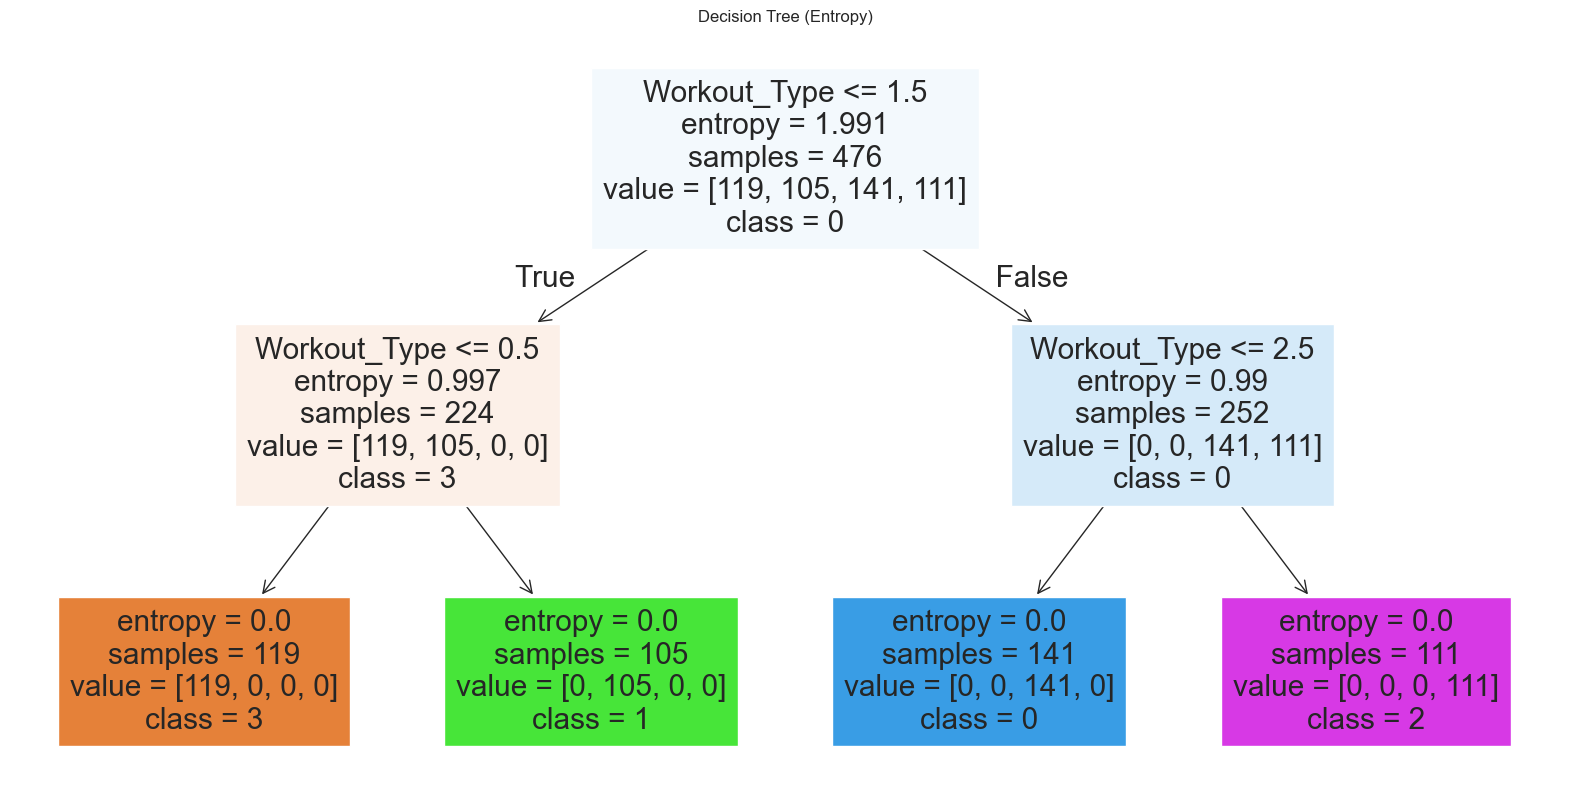

In [141]:
plt.figure(figsize=(20, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

In [142]:
'''Interpretation:
The decision tree using the Entropy criterion shows a detailed hierarchy of feature splits. Each node represents a decision based on the feature that minimizes entropy (or maximizes information gain), with leaf nodes indicating the predicted class. The depth of the tree reflects the model's complexity and ability to fit the training data. Features appearing closer to the root have greater importance. While the tree effectively classifies data, its complexity may indicate overfitting, especially if many leaf nodes have only a few samples. Comparing this to the Gini-based tree can provide insights into the difference in decision-making and feature importance.'''

"Interpretation:\nThe decision tree using the Entropy criterion shows a detailed hierarchy of feature splits. Each node represents a decision based on the feature that minimizes entropy (or maximizes information gain), with leaf nodes indicating the predicted class. The depth of the tree reflects the model's complexity and ability to fit the training data. Features appearing closer to the root have greater importance. While the tree effectively classifies data, its complexity may indicate overfitting, especially if many leaf nodes have only a few samples. Comparing this to the Gini-based tree can provide insights into the difference in decision-making and feature importance."

In [143]:
'''Interpretation:
 demonstrates decision tree classification using both Gini Index and Entropy criteria. It includes detailed EDA, accuracy evaluation, precision-recall analysis, confusion matrices, and ROC curves. Both models provide insights into feature importance and decision-making. However, the depth of the trees suggests a risk of overfitting. Visualization and metrics highlight the models' performance, offering a comprehensive understanding of classification techniques.'''

"Interpretation:\n demonstrates decision tree classification using both Gini Index and Entropy criteria. It includes detailed EDA, accuracy evaluation, precision-recall analysis, confusion matrices, and ROC curves. Both models provide insights into feature importance and decision-making. However, the depth of the trees suggests a risk of overfitting. Visualization and metrics highlight the models' performance, offering a comprehensive understanding of classification techniques."